In [1]:
%matplotlib inline
import numpy as np
import PP as pp
import matplotlib.pyplot as plt

### Defining agents:

In [2]:
ag1 = pp.agent_pp(np.array([0.5,0.5]), np.array([[0.85,0.15],[0.45,0.55]]))
ag1.evaluate_post()

In [3]:
ag2 = pp.agent_pp(np.array([0.5,0.5]), np.array([[0.85,0.15],[0.45,0.55]]))
ag2.evaluate_post()

### Simulation:

In [30]:
def simulate_pp(n, ag1, ag2, truth_1, truth_2, randomised = None):
    payoff_1 = 0
    
    for i in range(n):
        u = np.random.uniform()
        if randomised is None:
            rep_1 = ag1.report(u,truth_1)
        else:
            if np.random.uniform() < randomised:
                rep_1 = ag1.report(u,truth_1)
            else:
                rep_1 = ag1.report(u,~truth_1)
        rep_2 = ag2.report(u,truth_2)

        payoff_1 += pp.logarithmic(ag1, rep_1, ag2, rep_2)
        
    return payoff_1

In [13]:
truthful = [simulate_pp(1000, ag1, ag2, True, True) for i in range(1000)]

In [14]:
liar = [simulate_pp(1000, ag1, ag2, False, True) for i in range(1000)]

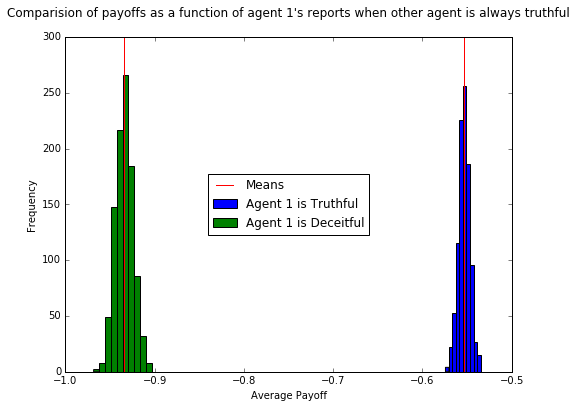

In [23]:
plt.figure(figsize=(8,6))
plt.hist([t/1000 for t in truthful], label = 'Agent 1 is Truthful')
plt.hist([l/1000 for l in liar], label = 'Agent 1 is Deceitful')
plt.axvline(np.mean([t/1000 for t in truthful]), color = 'red',label = 'Means')
plt.axvline(np.mean([l/1000 for l in liar]), color = 'red')
plt.xlabel('Average Payoff')
plt.ylabel('Frequency')
plt.legend(loc = 10)
plt.title("Comparision of payoffs as a function of agent 1's reports when other agent is always truthful\n")
plt.show()

In [32]:
rand_r = [simulate_pp(1000, ag1, ag2, True, True,0.5) for i in range(1000)]

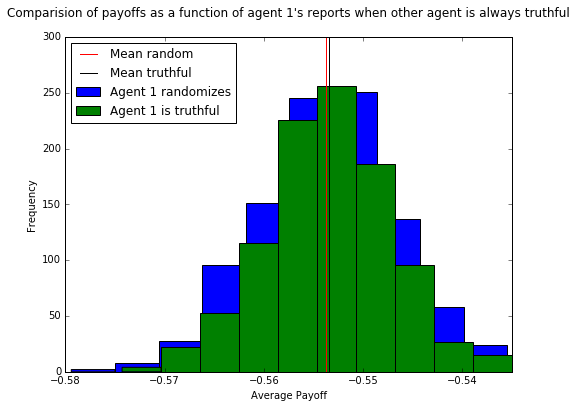

In [36]:
plt.figure(figsize=(8,6))
plt.hist([t/1000 for t in rand_r], label = 'Agent 1 randomizes')
plt.hist([l/1000 for l in truthful], label = 'Agent 1 is truthful')
plt.axvline(np.mean([t/1000 for t in rand_r]), color = 'red',label = 'Mean random')
plt.axvline(np.mean([l/1000 for l in truthful]), color = 'black', label = 'Mean truthful')
plt.xlabel('Average Payoff')
plt.ylabel('Frequency')
plt.legend(loc = 2)
plt.title("Comparision of payoffs as a function of agent 1's reports when other agent is always truthful\n")
plt.show()

In [8]:
ag3 = pp.agent_pp(np.array([0.5,0.5]), np.array([[0.25,0.75],[0.45,0.55]]))
ag3.evaluate_post()

In [9]:
truthful_2 = [simulate_pp(1000, ag1, ag3, True, True) for i in range(1000)]
liar_2 = [simulate_pp(1000, ag1, ag3, False, True) for i in range(1000)]

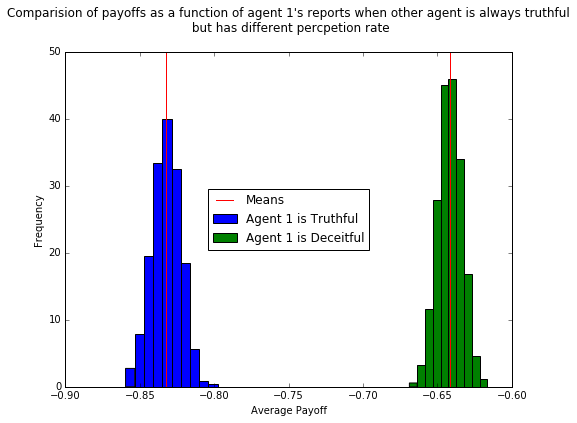

In [25]:
plt.figure(figsize=(8,6))
plt.hist([t/1000 for t in truthful_2], normed = True, label = 'Agent 1 is Truthful')
plt.hist([l/1000 for l in liar_2], normed = True, label = 'Agent 1 is Deceitful')
plt.axvline(np.mean([t/1000 for t in truthful_2]), color = 'red',label = 'Means')
plt.axvline(np.mean([l/1000 for l in liar_2]), color = 'red')
plt.xlabel('Average Payoff')
plt.ylabel('Frequency')
plt.legend(loc = 10)
plt.title("Comparision of payoffs as a function of agent 1's reports when other agent is always truthful\n but has different percpetion rate\n")
plt.show()

In [26]:
ag4 = pp.agent_pp(np.array([0.5,0.5]), np.array([[0.6,0.4],[0.5,0.5]]))
ag4.evaluate_post()

In [27]:
truthful_3 = [simulate_pp(1000, ag1, ag4, True, True) for i in range(1000)]
liar_3 = [simulate_pp(1000, ag1, ag4, False, True) for i in range(1000)]

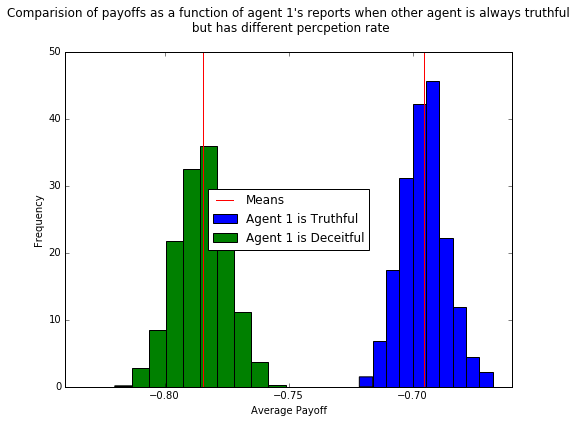

In [28]:
plt.figure(figsize=(8,6))
plt.hist([t/1000 for t in truthful_3], normed = True, label = 'Agent 1 is Truthful')
plt.hist([l/1000 for l in liar_3], normed = True, label = 'Agent 1 is Deceitful')
plt.axvline(np.mean([t/1000 for t in truthful_3]), color = 'red',label = 'Means')
plt.axvline(np.mean([l/1000 for l in liar_3]), color = 'red')
plt.xlabel('Average Payoff')
plt.ylabel('Frequency')
plt.legend(loc = 10)
plt.title("Comparision of payoffs as a function of agent 1's reports when other agent is always truthful\n but has different percpetion rate\n")
plt.show()

### Witkowksi

In [3]:
%matplotlib inline
import numpy as np
import PP as pp
import matplotlib.pyplot as plt

In [7]:
ag1 = pp.agent_pp(np.array([0.3,0.7]), np.array([[0.1,0.9],[0.8,0.2]]))
ag2 = pp.agent_pp(np.array([0.5,0.5]), np.array([[0.4,0.6],[0.5,0.5]]))

In [60]:
ag1.prior_signal

array([ 0.19310345,  0.18448276,  0.63793103])

We simulate 1000 games where both are truthful:

In [61]:
truthful_rewards_ag1 = []
rewards_ag2 = []
for j in range(1000):   
    ag1 = pp.agent_pp(np.array([0.3,0.7]), np.array([[0.1,0.9],[0.8,0.2]]))
    ag2 = pp.agent_pp(np.array([0.6,0.4]), np.array([[0.4,0.6],[0.6,0.4]]))
    
    reward_ag1 = 0
    reward_ag2 = 0

    for i in range(1000):
        prev_ag1 = ag1.prior_signal[0]
        prev_ag2 = ag2.prior_signal[0]
        if np.random.uniform() < 0.5:
            true_type = 0
        else:
            true_type = 1
        if np.random.uniform() < ag1.sig_dist[true_type][0]:
            signal_ag1 = 0
        else:
            signal_ag1 = 1

        if np.random.uniform() < ag2.sig_dist[true_type][0]:
            signal_ag2 = 0
        else:
            signal_ag2 = 1

        ag1.update_prior_signal(signal_ag1)
        ag2.update_prior_signal(signal_ag2)

        new_ag1 = ag1.prior_signal[0]
        new_ag2 = ag2.prior_signal[0]

        infered_1 = pp.infer_report(prev_ag1, new_ag1)
        infered_2 = pp.infer_report(prev_ag2, new_ag2)

        reward_ag1 += pp.reward_bpp(prev_ag1, new_ag1, infered_2)
        reward_ag2 += pp.reward_bpp(prev_ag2, new_ag2, infered_1)
    
    truthful_rewards_ag1.append(reward_ag1)
    rewards_ag2.append(reward_ag2)

We simulate 1000 games where agent lies on both his reports:

In [62]:
lying_both_rewards_ag1 = []
rewards_ag2 = []
for j in range(1000):   
    ag1 = pp.agent_pp(np.array([0.3,0.7]), np.array([[0.1,0.9],[0.8,0.2]]))
    ag2 = pp.agent_pp(np.array([0.6,0.4]), np.array([[0.4,0.6],[0.6,0.4]]))
    
    reward_ag1 = 0
    reward_ag2 = 0

    for i in range(1000):
        prev_ag1 = ag1.prior_signal[0]+np.random.uniform(-ag1.prior_signal[0], 1-ag1.prior_signal[0])
        prev_ag2 = ag2.prior_signal[0]
        if np.random.uniform() < 0.5:
            true_type = 0
        else:
            true_type = 1
        if np.random.uniform() < ag1.sig_dist[true_type][0]:
            signal_ag1 = 0
        else:
            signal_ag1 = 1

        if np.random.uniform() < ag2.sig_dist[true_type][0]:
            signal_ag2 = 0
        else:
            signal_ag2 = 1

        ag1.update_prior_signal(signal_ag1)
        ag2.update_prior_signal(signal_ag2)

        new_ag1 = ag1.prior_signal[0]+np.random.uniform(-ag1.prior_signal[0], 1-ag1.prior_signal[0])
        new_ag2 = ag2.prior_signal[0]

        infered_1 = pp.infer_report(prev_ag1, new_ag1)
        infered_2 = pp.infer_report(prev_ag2, new_ag2)

        reward_ag1 += pp.reward_bpp(prev_ag1, new_ag1, infered_2)
        reward_ag2 += pp.reward_bpp(prev_ag2, new_ag2, infered_1)
    
    lying_both_rewards_ag1.append(reward_ag1)
    rewards_ag2.append(reward_ag2)

We simulate 1000 games where he lies on his second report:

In [63]:
lying_second_rewards_ag1 = []
rewards_ag2 = []
for j in range(1000):   
    ag1 = pp.agent_pp(np.array([0.3,0.7]), np.array([[0.1,0.9],[0.8,0.2]]))
    ag2 = pp.agent_pp(np.array([0.6,0.4]), np.array([[0.4,0.6],[0.6,0.4]]))
    
    reward_ag1 = 0
    reward_ag2 = 0

    for i in range(1000):
        prev_ag1 = ag1.prior_signal[0]
        prev_ag2 = ag2.prior_signal[0]
        if np.random.uniform() < 0.5:
            true_type = 0
        else:
            true_type = 1
        if np.random.uniform() < ag1.sig_dist[true_type][0]:
            signal_ag1 = 0
        else:
            signal_ag1 = 1

        if np.random.uniform() < ag2.sig_dist[true_type][0]:
            signal_ag2 = 0
        else:
            signal_ag2 = 1

        ag1.update_prior_signal(signal_ag1)
        ag2.update_prior_signal(signal_ag2)

        new_ag1 = ag1.prior_signal[0]+np.random.uniform(-ag1.prior_signal[0], 1-ag1.prior_signal[0])
        new_ag2 = ag2.prior_signal[0]

        infered_1 = pp.infer_report(prev_ag1, new_ag1)
        infered_2 = pp.infer_report(prev_ag2, new_ag2)

        reward_ag1 += pp.reward_bpp(prev_ag1, new_ag1, infered_2)
        reward_ag2 += pp.reward_bpp(prev_ag2, new_ag2, infered_1)
    
    lying_second_rewards_ag1.append(reward_ag1)
    rewards_ag2.append(reward_ag2)

We simulate 1000 games where he lies on his first report

In [64]:
lying_first_rewards_ag1 = []
rewards_ag2 = []
for j in range(1000):   
    ag1 = pp.agent_pp(np.array([0.3,0.7]), np.array([[0.1,0.9],[0.8,0.2]]))
    ag2 = pp.agent_pp(np.array([0.6,0.4]), np.array([[0.4,0.6],[0.6,0.4]]))
    
    reward_ag1 = 0
    reward_ag2 = 0

    for i in range(1000):
        prev_ag1 = ag1.prior_signal[0]+np.random.uniform(-ag1.prior_signal[0], 1-ag1.prior_signal[0])
        prev_ag2 = ag2.prior_signal[0]
        if np.random.uniform() < 0.5:
            true_type = 0
        else:
            true_type = 1
        if np.random.uniform() < ag1.sig_dist[true_type][0]:
            signal_ag1 = 0
        else:
            signal_ag1 = 1

        if np.random.uniform() < ag2.sig_dist[true_type][0]:
            signal_ag2 = 0
        else:
            signal_ag2 = 1

        ag1.update_prior_signal(signal_ag1)
        ag2.update_prior_signal(signal_ag2)

        new_ag1 = ag1.prior_signal[0]
        new_ag2 = ag2.prior_signal[0]

        infered_1 = pp.infer_report(prev_ag1, new_ag1)
        infered_2 = pp.infer_report(prev_ag2, new_ag2)

        reward_ag1 += pp.reward_bpp(prev_ag1, new_ag1, infered_2)
        reward_ag2 += pp.reward_bpp(prev_ag2, new_ag2, infered_1)
    
    lying_first_rewards_ag1.append(reward_ag1)
    rewards_ag2.append(reward_ag2)

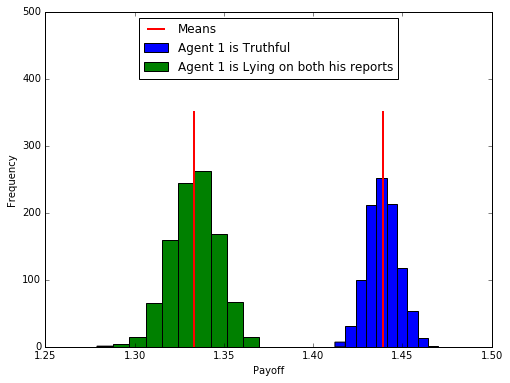

In [65]:
plt.figure(figsize=(8,6))
plt.hist([t/1000 for t in truthful_rewards_ag1], label = 'Agent 1 is Truthful')
plt.hist([t/1000 for t in lying_both_rewards_ag1], label = 'Agent 1 is Lying on both his reports')
plt.axvline(np.mean([t/1000 for t in truthful_rewards_ag1]), 0,0.7, color = 'red',label = 'Means', lw = 2)
plt.axvline(np.mean([l/1000 for l in lying_both_rewards_ag1]), 0,0.7 , color = 'red', lw = 2)
plt.ylim(0,500)
plt.xlabel('Payoff')
plt.ylabel('Frequency')
plt.legend(loc = 9)
plt.show()

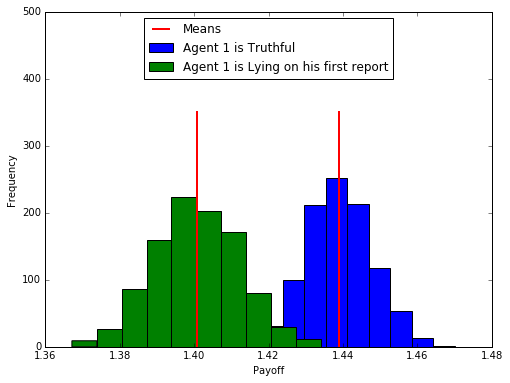

In [66]:
plt.figure(figsize=(8,6))
plt.hist([t/1000 for t in truthful_rewards_ag1], label = 'Agent 1 is Truthful')
plt.hist([t/1000 for t in lying_first_rewards_ag1], label = 'Agent 1 is Lying on his first report')
plt.axvline(np.mean([t/1000 for t in truthful_rewards_ag1]), 0,0.7, color = 'red',label = 'Means', lw = 2)
plt.axvline(np.mean([l/1000 for l in lying_first_rewards_ag1]), 0,0.7 , color = 'red', lw = 2)
plt.ylim(0,500)
plt.legend(loc = 9)
plt.xlabel('Payoff')
plt.ylabel('Frequency')
plt.show()

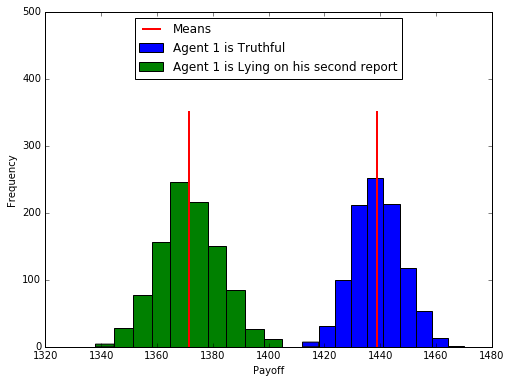

In [67]:
plt.figure(figsize=(8,6))
plt.hist([t for t in truthful_rewards_ag1], label = 'Agent 1 is Truthful')
plt.hist([t for t in lying_second_rewards_ag1], label = 'Agent 1 is Lying on his second report')
plt.axvline(np.mean([t for t in truthful_rewards_ag1]), 0,0.7, color = 'red',label = 'Means', lw = 2)
plt.axvline(np.mean([l for l in lying_second_rewards_ag1]), 0,0.7 , color = 'red', lw = 2)
plt.ylim(0,500)
plt.legend(loc = 9)
plt.xlabel('Payoff')
plt.ylabel('Frequency')
plt.show()

### 3 reports:

In [68]:
ag1 = pp.agent_pp(np.array([0.3,0.7]), np.array([[0.7,0.1, 0.2],[0.1,0.2,0.7]]))

In [69]:
ag1.prior_signal

array([ 0.28,  0.17,  0.55])

In [42]:
ag1.update_prior_signal(0)
ag1.prior_signal

array([ 0.41304348,  0.12173913,  0.46521739])

In [44]:
ag1.update_prior_signal(1)
ag1.prior_signal

array([ 0.16969697,  0.18333333,  0.6469697 ])

In [46]:
ag1.update_prior_signal(2)
ag1.prior_signal

array([ 0.1768595 ,  0.17644628,  0.64669421])

In [47]:
def quad(prob, i):
    return 2*prob[i]-np.sum(prob**2)

In [49]:
truthful_rewards_ag1 = []
rewards_ag2 = []
for j in range(1000):   
    ag1 = pp.agent_pp(np.array([0.3,0.7]), np.array([[0.7,0.1, 0.3],[0.1,0.2,0.7]]))
    ag2 = pp.agent_pp(np.array([0.6,0.4]), np.array([[0.8,0.15, 0.05],[0.2,0.1,0.7]]))
    
    reward_ag1 = 0
    reward_ag2 = 0

    for i in range(1000):
        prev_ag1 = ag1.prior_signal
        prev_ag2 = ag2.prior_signal
        if np.random.uniform() < 0.5:
            true_type = 0
        else:
            true_type = 1
        u = np.random.uniform()
        if  u < ag1.sig_dist[true_type][0]:
            signal_ag1 = 0
        elif u < ag1.sig_dist[true_type][1]:
            signal_ag1 = 1
        else:
            signal_ag1 = 2
        v = np.random.uniform()
        if v < ag2.sig_dist[true_type][0]:
            signal_ag2 = 0
        elif v < ag2.sig_dist[true_type][1]:
            signal_ag2 = 1
        else:
            signal_ag2 = 2
        
        ag1.update_prior_signal(signal_ag1)
        ag2.update_prior_signal(signal_ag2)

        new_ag1 = ag1.prior_signal
        new_ag2 = ag2.prior_signal

#         infered_1 = pp.infer_report(prev_ag1, new_ag1)
#         infered_2 = pp.infer_report(prev_ag2, new_ag2)
        
        reward_ag1 += quad(prev_ag1, signal_ag2) + quad(new_ag1, signal_ag2)
        reward_ag2 += quad(prev_ag2, signal_ag1) + quad(new_ag2, signal_ag1)
    
    truthful_rewards_ag1.append(reward_ag1)
    rewards_ag2.append(reward_ag2)

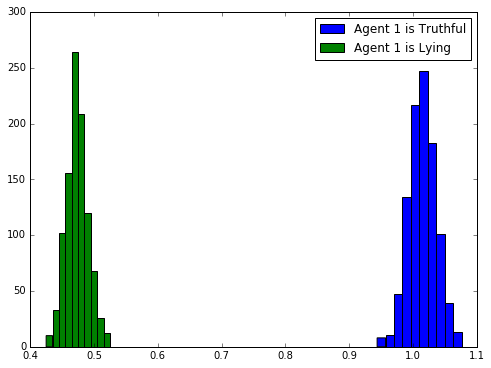

In [59]:
plt.figure(figsize=(8,6))
plt.hist([t/1000 for t in truthful_rewards_ag1], label = 'Agent 1 is Truthful')
plt.hist([t/1000 for t in lying_rewards_ag1], label = 'Agent 1 is Lying')
plt.legend()

In [58]:
lying_rewards_ag1 = []
rewards_ag2 = []
for j in range(1000):   
    ag1 = pp.agent_pp(np.array([0.3,0.7]), np.array([[0.7,0.1, 0.3],[0.1,0.2,0.7]]))
    ag2 = pp.agent_pp(np.array([0.6,0.4]), np.array([[0.8,0.15, 0.05],[0.2,0.1,0.7]]))
    
    reward_ag1 = 0
    reward_ag2 = 0

    for i in range(1000):
        prev_ag1 = ag1.prior_signal
        prev_ag2 = ag2.prior_signal
        if np.random.uniform() < 0.5:
            true_type = 0
        else:
            true_type = 1
        u = np.random.uniform()
        if  u < ag1.sig_dist[true_type][0]:
            signal_ag1 = 0
        elif u < ag1.sig_dist[true_type][1]:
            signal_ag1 = 1
        else:
            signal_ag1 = 2
        v = np.random.uniform()
        if v < ag2.sig_dist[true_type][0]:
            signal_ag2 = 0
        elif v < ag2.sig_dist[true_type][1]:
            signal_ag2 = 1
        else:
            signal_ag2 = 2

        ag1.update_prior_signal(signal_ag1)
        ag2.update_prior_signal(signal_ag2)

        new_ag1 = ag1.prior_signal
        uu = np.random.uniform(size=3)
        new_ag1 = uu/np.sum(uu)
        new_ag2 = ag2.prior_signal
        
        uu2 = np.random.uniform(size=3)

#         infered_1 = pp.infer_report(prev_ag1, new_ag1)
#         infered_2 = pp.infer_report(prev_ag2, new_ag2)

        reward_ag1 += quad(uu2/np.sum(uu2), signal_ag2) + quad(new_ag1, signal_ag2)
        reward_ag2 += quad(prev_ag2, signal_ag1) + quad(new_ag2, signal_ag1)
    
    lying_rewards_ag1.append(reward_ag1)
    rewards_ag2.append(reward_ag2)

### Candidate SPP:

In [128]:
ag1 = pp.agent_pp(np.array([0.3,0.7]), np.array([[0.1,0.9],[0.8,0.2]]))
ag2 = pp.agent_pp(np.array([0.6,0.4]), np.array([[0.4,0.6],[0.6,0.4]]))
    
delta = np.random.uniform(0,2*np.min(ag1.signal_given_signal(0,0)-ag1.signal_given_signal(0,1),
                                      ag2.signal_given_signal(0,0)-ag2.signal_given_signal(0,1)))
truthful_rewards_ag1 = []
rewards_ag2 = []
for j in range(1000):   
    
    ag1 = pp.agent_pp(np.array([0.3,0.7]), np.array([[0.1,0.9],[0.8,0.2]]))
    ag2 = pp.agent_pp(np.array([0.6,0.4]), np.array([[0.4,0.6],[0.6,0.4]]))
    
    reward_ag1 = 0
    reward_ag2 = 0

    for i in range(1000):
        prev_ag1 = ag1.prior_signal[0]
        prev_ag2 = ag2.prior_signal[0]
        if np.random.uniform() < 0.5:
            true_type = 0
        else:
            true_type = 1
        if np.random.uniform() < ag1.sig_dist[true_type][0]:
            signal_ag1 = 0
        else:
            signal_ag1 = 1

        if np.random.uniform() < ag2.sig_dist[true_type][0]:
            signal_ag2 = 0
        else:
            signal_ag2 = 1

        ag1.update_prior_signal(signal_ag1)
        ag2.update_prior_signal(signal_ag2)
        
        if signal_ag1 == 0:
            new_ag1 = prev_ag1 + delta
        else:
            new_ag1 = prev_ag1 - delta
        
        if signal_ag2 == 0:
            new_ag2 = prev_ag2 + delta
        else:
            new_ag2 = prev_ag2 - delta

        reward_ag1 += pp.reward_bpp(prev_ag1, new_ag1, signal_ag2)
        reward_ag2 += pp.reward_bpp(prev_ag2, new_ag2, signal_ag1)
    
    truthful_rewards_ag1.append(reward_ag1)
    rewards_ag2.append(reward_ag2)

In [129]:
ag1 = pp.agent_pp(np.array([0.3,0.7]), np.array([[0.1,0.9],[0.8,0.2]]))
ag2 = pp.agent_pp(np.array([0.6,0.4]), np.array([[0.4,0.6],[0.6,0.4]]))
delta = np.random.uniform(0,2*np.min(ag1.signal_given_signal(0,0)-ag1.signal_given_signal(0,1),
                                      ag2.signal_given_signal(0,0)-ag2.signal_given_signal(0,1)))

lying_both_rewards_ag1 = []
rewards_ag2 = []
for j in range(1000):   
    ag1 = pp.agent_pp(np.array([0.3,0.7]), np.array([[0.1,0.9],[0.8,0.2]]))
    ag2 = pp.agent_pp(np.array([0.6,0.4]), np.array([[0.4,0.6],[0.6,0.4]]))
    
    reward_ag1 = 0
    reward_ag2 = 0

    for i in range(1000):
        prev_ag1 = ag1.prior_signal[0]+np.random.uniform(-ag1.prior_signal[0],1-ag1.prior_signal[0])
        prev_ag2 = ag2.prior_signal[0]
        if np.random.uniform() < 0.5:
            true_type = 0
        else:
            true_type = 1
        if np.random.uniform() < ag1.sig_dist[true_type][0]:
            signal_ag1 = 0
        else:
            signal_ag1 = 1

        if np.random.uniform() < ag2.sig_dist[true_type][0]:
            signal_ag2 = 0
        else:
            signal_ag2 = 1

        ag1.update_prior_signal(signal_ag1)
        ag2.update_prior_signal(signal_ag2)
        
        if signal_ag1 == 1:
            new_ag1 = prev_ag1 + delta
        else:
            new_ag1 = prev_ag1 - delta
        
        if signal_ag2 == 0:
            new_ag2 = prev_ag2 + delta
        else:
            new_ag2 = prev_ag2 - delta

        reward_ag1 += pp.reward_bpp(prev_ag1, new_ag1, signal_ag2)
        reward_ag2 += pp.reward_bpp(prev_ag2, new_ag2, signal_ag1)
    
    lying_both_rewards_ag1.append(reward_ag1)
    rewards_ag2.append(reward_ag2)

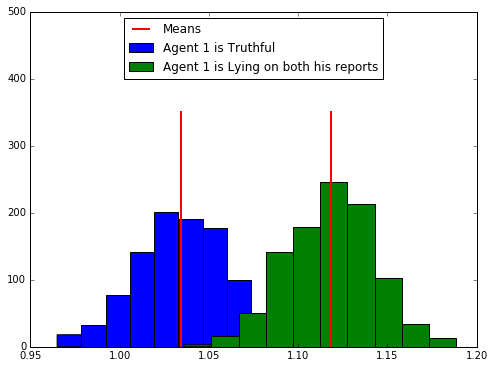

In [130]:
plt.figure(figsize=(8,6))
plt.hist([t/1000 for t in truthful_rewards_ag1], label = 'Agent 1 is Truthful')
plt.hist([t/1000 for t in lying_both_rewards_ag1], label = 'Agent 1 is Lying on both his reports')
plt.axvline(np.mean([t/1000 for t in truthful_rewards_ag1]), 0,0.7, color = 'red',label = 'Means', lw = 2)
plt.axvline(np.mean([l/1000 for l in lying_both_rewards_ag1]), 0,0.7 , color = 'red', lw = 2)
plt.ylim(0,500)
plt.legend(loc = 9)